In [29]:
%matplotlib inline
import csv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
evaluations_file = open("vacabulary_test_results/evaluation_all_18-11-2016_16-16.csv", "r")

In [3]:
evaluations_reader = csv.reader(evaluations_file)

In [4]:
col_names = next(evaluations_reader)
col_names

['vocabulary_builder',
 'comment',
 'arguments',
 'vocabulary_length',
 'tr_set_size',
 'te_set_size',
 'standard_accuracy',
 'uniform_accuracy']

In [5]:
evaluations = {}
for row in evaluations_reader:
    if not (row[0] in evaluations.keys()): evaluations[row[0]] = []
    evaluations[row[0]] += [{c: r for c, r in zip(col_names[1:], row[1:])}]

In [6]:
evaluations.keys()

dict_keys(['ig-based', 'ig-based non uniform', 'xi-square', 'most-common'])

In [7]:
x, y, z = {}, {}, {}
for key in evaluations.keys():
    x[key] = [ int(e["vocabulary_length"]) for e in evaluations[key] ]
    y[key] = [ float(e["standard_accuracy"]) for e in evaluations[key] ]
    z[key] = [ float(e["uniform_accuracy"]) for e in evaluations[key] ]

In [47]:
len(x["most-common"]), len(y["most-common"])

(9, 9)

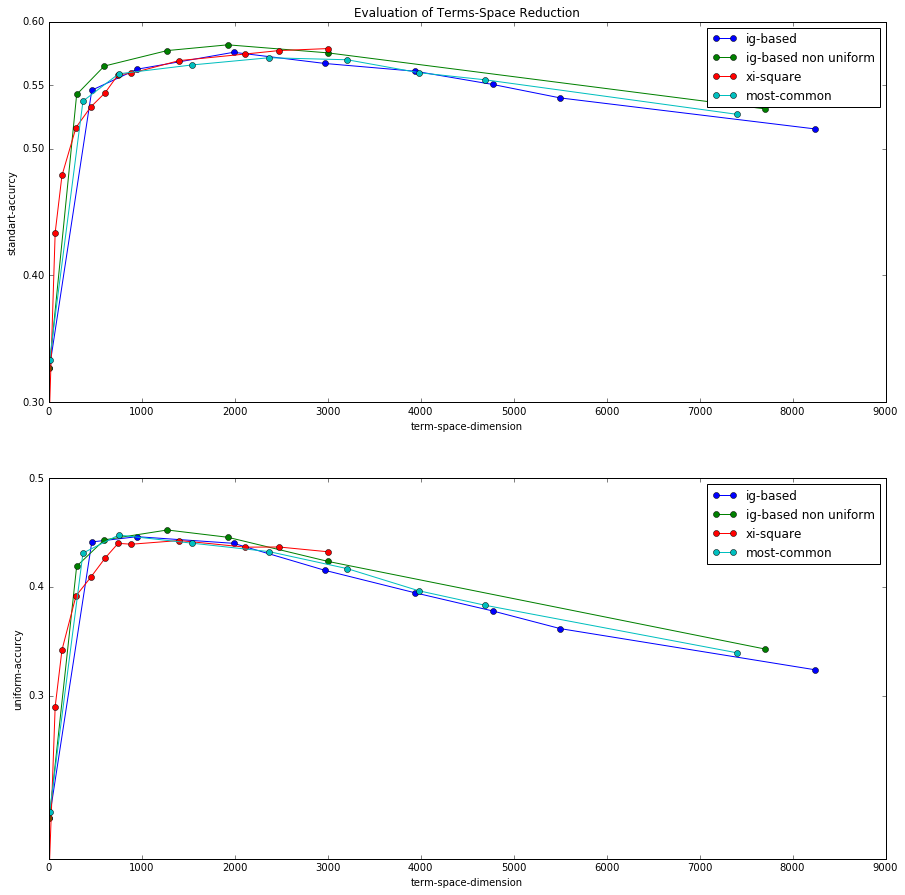

In [69]:
fig = plt.figure()
fig.set_size_inches(15,15)

ax_st = fig.add_subplot(211)
ax_un = fig.add_subplot(212)

ax_st.set_ylim((0.3, 0.6))
ax_un.set_ylim((0.15, 0.45))

for key in list(evaluations.keys()):
    ax_st.plot(x[key],y[key],"o-", label=key)
    ax_un.plot(x[key],z[key],"o-", label=key)

ax_st.set_title("Evaluation of Terms-Space Reduction")

ax_st.set_xlabel("term-space-dimension")
ax_st.set_ylabel("standart-accurcy")

ax_un.set_xlabel("term-space-dimension")
ax_un.set_ylabel("uniform-accurcy")

ax_st.set_yticks((0.3,0.4,0.5,0.55,0.6))
ax_un.set_yticks((0.3,0.4,0.5))

ax_st.legend()
ax_un.legend()

In [11]:
import pydoc

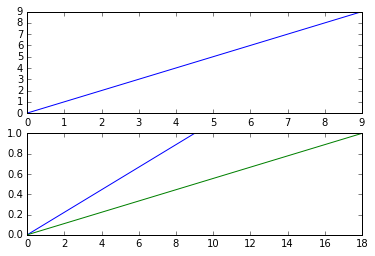

In [43]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.plot(range(10))
o = np.arange(10)
ob = 2*np.arange(10)
ax2.plot(o, np.linspace(0,1,10))
ax2.plot(ob, np.linspace(0,1,10))
#ax.set_yticks((2,5,7))
#labels = ax.set_yticklabels(('really, really, really', 'long', 'labels'))

In [111]:
type(evaluations.keys())

dict_keys

In [40]:
np.linspace(0.1,1,10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [75]:
p = 1 if False else 2

In [76]:
p

2